In [21]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [22]:
train = pd.read_csv('test_and_train_installs/train_data_encoded.csv')
test = pd.read_csv('test_and_train_installs/test_data_encoded.csv')

train2 = pd.read_csv('test_and_train_installs/train_data_encoded2.csv')
test2 = pd.read_csv('test_and_train_installs/test_data_encoded2.csv')

train3 = pd.read_csv('test_and_train_installs/train_data_encoded3.csv')
test3 = pd.read_csv('test_and_train_installs/test_data_encoded3.csv')

train4 = pd.read_csv('test_and_train_installs/train_data_encoded4.csv')
test4 = pd.read_csv('test_and_train_installs/test_data_encoded4.csv')

In [23]:
ref_hashes_train = train['ref_hash']
del train['ref_hash']

ref_hashes_train2 = train2['ref_hash']
del train2['ref_hash']

ref_hashes_train3 = train3['ref_hash']
del train3['ref_hash']

ref_hashes_train4 = train4['ref_hash']
del train4['ref_hash']

In [24]:
Xtrain, ytrain = train.iloc[:,:-1],train.iloc[:,-1]
Xtrain2, ytrain2 = train2.iloc[:,:-1],train2.iloc[:,-1]
Xtrain3, ytrain3 = train3.iloc[:,:-1],train3.iloc[:,-1]
Xtrain4, ytrain4 = train4.iloc[:,:-1],train4.iloc[:,-1]

In [25]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', 
                colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [26]:
# Entrenamiento
xg_reg.fit(Xtrain,ytrain)

/home/santiago/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/santiago/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=10, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [27]:
targets = pd.read_csv('target_competencia_ids.csv')

In [28]:
test['ref_hash'] = test['ref_hash'].astype(str) + '_sc'
test['ref_hash'] = test['ref_hash'].astype('object')

test2['ref_hash'] = test2['ref_hash'].astype(str) + '_sc'
test2['ref_hash'] = test2['ref_hash'].astype('object')

test3['ref_hash'] = test3['ref_hash'].astype(str) + '_sc'
test3['ref_hash'] = test3['ref_hash'].astype('object')

test4['ref_hash'] = test4['ref_hash'].astype(str) + '_sc'
test4['ref_hash'] = test4['ref_hash'].astype('object')

In [29]:
merged_test_targets = targets.merge(test, on='ref_hash', how='left').drop('obj', axis=1)
merged_test2_targets = targets.merge(test2, on='ref_hash', how='left').drop('obj', axis=1)
merged_test3_targets = targets.merge(test3, on='ref_hash', how='left').drop('obj', axis=1)
merged_test4_targets = targets.merge(test4, on='ref_hash', how='left').drop('obj', axis=1)

In [31]:
installs_merged = merged_test_targets.loc[merged_test_targets['ref_hash'].str.contains("_sc")]
installs_merged2 = merged_test2_targets.loc[merged_test2_targets['ref_hash'].str.contains("_sc")]
installs_merged3 = merged_test3_targets.loc[merged_test2_targets['ref_hash'].str.contains("_sc")]
installs_merged4 = merged_test4_targets.loc[merged_test2_targets['ref_hash'].str.contains("_sc")]

In [32]:
installs_merged['time_to_install'].fillna(259200, inplace=True)
installs_merged2['time_to_install'].fillna(259200, inplace=True)
installs_merged3['time_to_install'].fillna(259200, inplace=True)
installs_merged4['time_to_install'].fillna(259200, inplace=True)

/home/santiago/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [35]:
ref_hashes_installs_merged = installs_merged['ref_hash']
del installs_merged['ref_hash']

ref_hashes_installs_merged2 = installs_merged2['ref_hash']
del installs_merged2['ref_hash']

ref_hashes_installs_merged3 = installs_merged3['ref_hash']
del installs_merged3['ref_hash']

ref_hashes_installs_merged4 = installs_merged4['ref_hash']
del installs_merged4['ref_hash']

In [36]:
Xtest, ytest = installs_merged.iloc[:,:-1], installs_merged.iloc[:,-1]
Xtest2, ytest2 = installs_merged2.iloc[:,:-1], installs_merged2.iloc[:,-1]
Xtest3, ytest3 = installs_merged3.iloc[:,:-1], installs_merged3.iloc[:,-1]
Xtest4, ytest4 = installs_merged4.iloc[:,:-1], installs_merged4.iloc[:,-1]

In [37]:
df_ytest = pd.DataFrame(ytest)
df_ytest.reset_index(inplace=True)
del df_ytest['index']

df_ytest2 = pd.DataFrame(ytest2)
df_ytest2.reset_index(inplace=True)
del df_ytest2['index']

df_ytest3 = pd.DataFrame(ytest3)
df_ytest3.reset_index(inplace=True)
del df_ytest3['index']

df_ytest4 = pd.DataFrame(ytest4)
df_ytest4.reset_index(inplace=True)
del df_ytest4['index']

In [38]:
#predecir los 4k
Xtest.reset_index(inplace=True)
del Xtest['index']

Xtest2.reset_index(inplace=True)
del Xtest2['index']

Xtest3.reset_index(inplace=True)
del Xtest3['index']

Xtest4.reset_index(inplace=True)
del Xtest4['index']

In [39]:
# Prediccion
preds = xg_reg.predict(Xtest)

In [41]:
df_preds = pd.DataFrame(ref_hashes_installs_merged)
df_preds['preds_v1'] = preds
df_preds['ytest_v1'] = ytest
df_preds

,ref_hash,preds_v1,ytest_v1
0,1000169251625791246_sc,84093.164062,29646.1780
2,1000395625957344683_sc,83654.585938,259200.0000
4,1003027494996471685_sc,84139.117188,247044.3875
6,1006670001679961544_sc,83441.812500,4844.0530
8,1007573308966476713_sc,83654.585938,259200.0000
10,1010070503877148763_sc,83654.585938,259200.0000
12,1010265377387765028_sc,83654.585938,259200.0000
14,1010531372912327058_sc,83654.585938,259200.0000
16,1011610998357271358_sc,83925.476562,5657.6230
18,1013543838965040946_sc,83654.585938,259200.0000


In [42]:
# Error RMSE
rmse = np.sqrt(mean_squared_error(ytest, preds))
print("RMSE: %f" % (rmse))

RMSE: 151063.749212


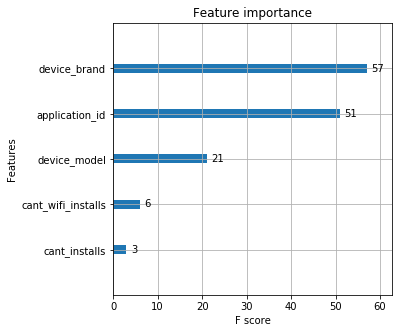

In [43]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

In [44]:
# Entrenamiento 2
xg_reg.fit(Xtrain2,ytrain2)

/home/santiago/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/santiago/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=10, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [45]:
# Prediccion 2
preds2 = xg_reg.predict(Xtest2)

In [46]:
# Error RMSE
rmse = np.sqrt(mean_squared_error(ytest2, preds2))
print("RMSE: %f" % (rmse))

RMSE: 151186.887008


In [47]:
df_preds['predictions_v2'] = preds2
df_preds['ytest_v2'] = ytest2
df_preds

,ref_hash,preds_v1,ytest_v1,predictions_v2,ytest_v2
0,1000169251625791246_sc,84093.164062,29646.1780,84091.039062,259200.0000
2,1000395625957344683_sc,83654.585938,259200.0000,84091.039062,259200.0000
4,1003027494996471685_sc,84139.117188,247044.3875,85341.437500,160644.3875
6,1006670001679961544_sc,83441.812500,4844.0530,84091.039062,259200.0000
8,1007573308966476713_sc,83654.585938,259200.0000,84091.039062,259200.0000
10,1010070503877148763_sc,83654.585938,259200.0000,84091.039062,259200.0000
12,1010265377387765028_sc,83654.585938,259200.0000,84091.039062,259200.0000
14,1010531372912327058_sc,83654.585938,259200.0000,84091.039062,259200.0000
16,1011610998357271358_sc,83925.476562,5657.6230,84091.039062,259200.0000
18,1013543838965040946_sc,83654.585938,259200.0000,84091.039062,259200.0000


In [48]:
# Entrenamiento 3
xg_reg.fit(Xtrain3,ytrain3)

/home/santiago/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/santiago/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=10, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [49]:
# Prediccion 3
preds3 = xg_reg.predict(Xtest3)

In [55]:
# Error RMSE
rmse = np.sqrt(mean_squared_error(ytest3, preds3))
print("RMSE: %f" % (rmse))

RMSE: 148094.599492


In [51]:
df_preds['predictions_v3'] = preds3
df_preds['ytest_v3'] = ytest3
df_preds

,ref_hash,preds_v1,ytest_v1,predictions_v2,ytest_v2,predictions_v3,ytest_v3
0,1000169251625791246_sc,84093.164062,29646.1780,84091.039062,259200.0000,88575.640625,259200.0000
2,1000395625957344683_sc,83654.585938,259200.0000,84091.039062,259200.0000,88575.640625,259200.0000
4,1003027494996471685_sc,84139.117188,247044.3875,85341.437500,160644.3875,84810.460938,74244.3875
6,1006670001679961544_sc,83441.812500,4844.0530,84091.039062,259200.0000,88575.640625,259200.0000
8,1007573308966476713_sc,83654.585938,259200.0000,84091.039062,259200.0000,88575.640625,259200.0000
10,1010070503877148763_sc,83654.585938,259200.0000,84091.039062,259200.0000,86218.226562,239960.7560
12,1010265377387765028_sc,83654.585938,259200.0000,84091.039062,259200.0000,88575.640625,259200.0000
14,1010531372912327058_sc,83654.585938,259200.0000,84091.039062,259200.0000,88575.640625,259200.0000
16,1011610998357271358_sc,83925.476562,5657.6230,84091.039062,259200.0000,88575.640625,259200.0000
18,1013543838965040946_sc,83654.585938,259200.0000,84091.039062,259200.0000,85821.640625,251325.2050


In [52]:
# Entrenamiento 4
xg_reg.fit(Xtrain4,ytrain4)

/home/santiago/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/santiago/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=10, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [53]:
# Prediccion 4
preds4 = xg_reg.predict(Xtest4)

In [54]:
# Error RMSE
rmse = np.sqrt(mean_squared_error(ytest4, preds4))
print("RMSE: %f" % (rmse))

RMSE: 146597.975946


In [57]:
df_preds['predictions_v4'] = preds4
df_preds['ytest_v4'] = ytest4
df_preds

,ref_hash,preds_v1,ytest_v1,predictions_v2,ytest_v2,predictions_v3,ytest_v3,predictions_v4,ytest_v4
0,1000169251625791246_sc,84093.164062,29646.1780,84091.039062,259200.0000,88575.640625,259200.0000,86504.476562,259200.000
2,1000395625957344683_sc,83654.585938,259200.0000,84091.039062,259200.0000,88575.640625,259200.0000,86504.476562,259200.000
4,1003027494996471685_sc,84139.117188,247044.3875,85341.437500,160644.3875,84810.460938,74244.3875,86504.476562,259200.000
6,1006670001679961544_sc,83441.812500,4844.0530,84091.039062,259200.0000,88575.640625,259200.0000,86504.476562,259200.000
8,1007573308966476713_sc,83654.585938,259200.0000,84091.039062,259200.0000,88575.640625,259200.0000,86504.476562,259200.000
10,1010070503877148763_sc,83654.585938,259200.0000,84091.039062,259200.0000,86218.226562,239960.7560,84142.265625,153560.756
12,1010265377387765028_sc,83654.585938,259200.0000,84091.039062,259200.0000,88575.640625,259200.0000,86504.476562,259200.000
14,1010531372912327058_sc,83654.585938,259200.0000,84091.039062,259200.0000,88575.640625,259200.0000,86504.476562,259200.000
16,1011610998357271358_sc,83925.476562,5657.6230,84091.039062,259200.0000,88575.640625,259200.0000,86504.476562,259200.000
18,1013543838965040946_sc,83654.585938,259200.0000,84091.039062,259200.0000,85821.640625,251325.2050,86151.125000,164925.205


In [59]:
df2 = pd.DataFrame(ref_hashes_installs_merged)
df2['predictions'] = (df_preds['preds_v1'] + df_preds['predictions_v2'] + df_preds['predictions_v3'] + df_preds['predictions_v4']) / 4
df2.to_csv('submit_kaggle/pred_installs.csv', index=False)

In [60]:
df2

,ref_hash,predictions
0,1000169251625791246_sc,85816.078125
2,1000395625957344683_sc,85706.437500
4,1003027494996471685_sc,85198.875000
6,1006670001679961544_sc,85653.242188
8,1007573308966476713_sc,85706.437500
10,1010070503877148763_sc,84526.531250
12,1010265377387765028_sc,85706.437500
14,1010531372912327058_sc,85706.437500
16,1011610998357271358_sc,85774.156250
18,1013543838965040946_sc,84929.593750
